In [1]:
import numpy as np
import pandas as pd

In [2]:
dict1={'Names':['Ramesh','Suresh',np.nan,'Mahesh'],
      'Age':[31,32,33,np.nan],
      'City':[np.nan,'Hyd','Mumbai','Chennai']}

In [4]:
data1=pd.DataFrame(dict1)

In [5]:
data1.isnull()

,Names,Age,City
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False


In [6]:
data1.isnull().sum()
# every column has one missing value is there

Names    1
Age      1
City     1
dtype: int64

In [7]:
data1.isnull().sum()/len(data1)

Names    0.25
Age      0.25
City     0.25
dtype: float64

In [8]:
data1.isnull().sum()*100/len(data1)

Names    25.0
Age      25.0
City     25.0
dtype: float64

In [10]:
dict2={'Names':['Ramesh','Suresh',None,'Mahesh'],
      'Age':[31,32,33,None],
      'City':[None,'Hyd','Mumbai','Chennai']}
data2=pd.DataFrame(dict2)
data2

,Names,Age,City
0,Ramesh,31.0,None
1,Suresh,32.0,Hyd
2,None,33.0,Mumbai
3,Mahesh,NaN,Chennai


In [11]:
data2.isnull()

,Names,Age,City
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False


In [12]:
data2.isnull().sum()

Names    1
Age      1
City     1
dtype: int64

In [13]:
dict3={'Names':['Ramesh','Suresh','Null','Mahesh'],
      'Age':[31,32,33,'Null'],
      'City':['Null','Hyd','Mumbai','Chennai']}
data3=pd.DataFrame(dict3)
data3

,Names,Age,City
0,Ramesh,31,Null
1,Suresh,32,Hyd
2,Null,33,Mumbai
3,Mahesh,Null,Chennai


**Method-1**

>Fill the missing values with random number

dataframe name= data1

method name:fillna

In [14]:
data1.fillna(40)

,Names,Age,City
0,Ramesh,31.0,40
1,Suresh,32.0,Hyd
2,40,33.0,Mumbai
3,Mahesh,40.0,Chennai


**Method-2**

>Fill the missing values with random number on specific column

dataframe name= data1

method name:fillna

In [19]:
data1['Names'].fillna('Sathish',inplace=True)
data1

,Names,Age,City
0,Ramesh,31.0,NaN
1,Suresh,32.0,Hyd
2,Sathish,33.0,Mumbai
3,Mahesh,NaN,Chennai


In [20]:
#Create the data again
dict1={'Names':['Ramesh','Suresh',np.nan,'Mahesh'],
      'Age':[31,32,33,np.nan],
      'City':[np.nan,'Hyd','Mumbai','Chennai']}
data1=pd.DataFrame(dict1)

**Method-3**

- bfill

- ffill

- pad

- backfill

In [21]:
data1.fillna(method='backfill')
# Names  index 2 has missed value
#        it will replace by index 3 value
#Age  index 3 has missed value
#     we dont have index 4, so the value is NaN
# City index 0 has missed value
#      it replace with index 1 value

,Names,Age,City
0,Ramesh,31.0,Hyd
1,Suresh,32.0,Hyd
2,Mahesh,33.0,Mumbai
3,Mahesh,NaN,Chennai


In [22]:
data1

,Names,Age,City
0,Ramesh,31.0,NaN
1,Suresh,32.0,Hyd
2,NaN,33.0,Mumbai
3,Mahesh,NaN,Chennai


- bfill and backfill both are same

- pad and ffill both are same

**Method-4**

- Mean

- Median

- Mode

In [23]:
data1

,Names,Age,City
0,Ramesh,31.0,NaN
1,Suresh,32.0,Hyd
2,NaN,33.0,Mumbai
3,Mahesh,NaN,Chennai


In [24]:
age_mean=data1['Age'].mean()
age_mean

32.0

In [25]:
data1['Age'].fillna(age_mean)

0    31.0
1    32.0
2    33.0
3    32.0
Name: Age, dtype: float64

In [27]:
# instead of providing a random number
# we are filling with mean of the data
age_median=data1['Age'].median()
age_median
data1['Age'].fillna(age_median)

0    31.0
1    32.0
2    33.0
3    32.0
Name: Age, dtype: float64

In [ ]:
# Level1: Mean median mode
# Level2: bfill fill
# level3:

**Method-5:KNN imputer**

KNN: K nearest neighbours
    
- in the KNN imputer instead of taking mean of all the values

- will choose neigbours data

- will take those mean only

**KNN Imputer**

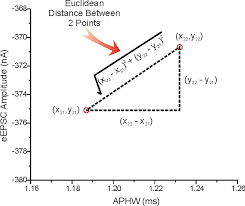

In [ ]:
n_neighbors is parameter can choose by user

if we dont choose by default it will takes as =5

In [31]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=2)
knn.fit_transform(data1[['Age']])

array([[31.],
       [32.],
       [33.],
       [32.]])

In [33]:
data1

,Names,Age,City
0,Ramesh,31.0,NaN
1,Suresh,32.0,Hyd
2,NaN,33.0,Mumbai
3,Mahesh,NaN,Chennai


**Method-6**

- Based on other columns

- Some times all above methods will not provide good justification

- at that time we need to check other columns dependancy also

- Most of the time will pick a column which have highest correlation

In [ ]:
l